# Gradient Descent: Part II

In chapter 3, we looked through the basic idea of gradient descent and how it can help to find the optimal point for a given function. In this chapter, I will walk through how the algorithm we developed in chapter 3 can be used for linear regression. However, this transition is quite a jump in thought process. Essentially, spend some time thinking about the the following challenge. 
 
<div style="background:lightyellow; padding:5px;">
In chapter 3, we knew the function for which we were exploring the optimal point. But in the case of linear regression we only have bunch of data points (X, y) and we trying to estimate the underlying function that leads to y given a set of parameters X. So, one has to think about
<ol>
    <li>how this related to miminization problem?, and </li>
    <li>what function are we trying to minimize?</li>
</ol>
</div>

If you have skipped Chapter 1 or forgot the details, this might be a great time to review it. As I said earlier, the objective of linear regression is to estimate the underlying function that given a set of parameters X can generate y. As I discussed in chapter 1, one can come up with any random function but how do we evaluate the validate that this is a reasonalable function. One of the evaluation metric discussed in chapter 1 is **Mean Square Error or MSE**. It's the mean square distance between the predicted and actual target value. Mathematically, it is written as:

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y_i})^2 $$

where
* $m$ represents number of data points
* $\hat{y_i}$ represents predicted target value
* $y_i$ represents actual target value

if MSE is a good metric to evaluate the quality of a model, a natural thought would be why not focus on building a model that minimizes MSE. Great, atleast now we are talking about some minimization problem and also have a function, MSE, that is differentiable. Thus, we can leverage Gradient descent algorithm. But still there is a problem. $m$ and $y_i$ are known values from the given dataset but we don't know how to compute $\hat{y_i}$. This is where linear regression gets interesting. We can compute $\hat{y_i}$ using random function as long as it's a linear combination of input parameters (though the parameters themselves can be exponential, log, etc). To make this understanding concrete, let's assume we have 1000 data points with the underlying function being $y = 4x_1^2 + 2x_2^2 + \$. 


try to show how the idea of gradient descent can be used in linear regression. Broadly speaking, in linear regression we have bunch of observations and we want to discover the underlying function that has generated these observations. For instance, similar to previous 

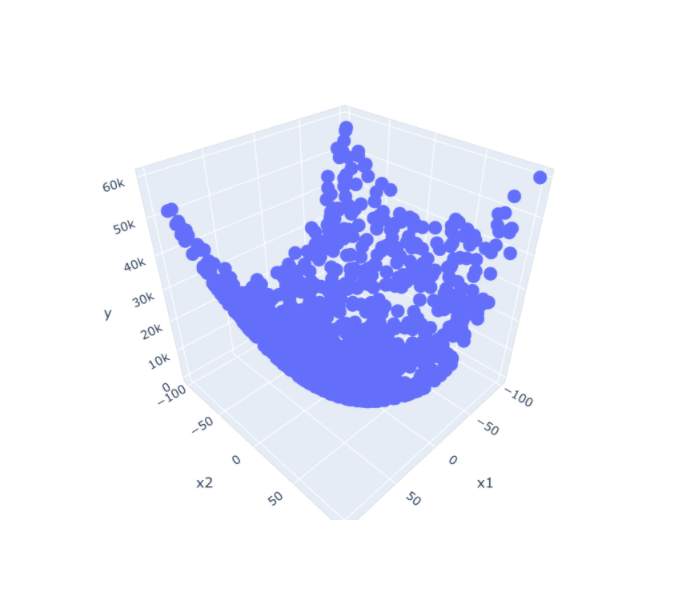

In [1]:
from numpy.random import normal
import pandas as pd
import random

dataDF = pd.DataFrame({
  'x1':  [random.randint(-100, 100) for x in range(1000)],
  'x2':  [random.randint(-100, 100) for x in range(1000)],    
  'noise': list(normal(loc=0.0, scale=2, size=1000))  
})
dataDF['y'] = 4 * dataDF['x1']**2 + 2 * dataDF['x2']**2 + dataDF['noise']

import plotly.express as px
fig = px.scatter_3d(dataDF, x='x1', y='x2', z='y')
image = fig.to_image(format='png')
from IPython.display import Image
Image(image)
# fig.show() -- use this command for generating interactive image

In [3]:
from copy import copy
from scipy.spatial import distance
from random import random
from IPython.display import HTML
import numpy as np

def gradient(X, y, theta):
    num_samples = X.shape[0]
    y_prime = np.sum(np.transpose(theta)*X, axis=1)
    diff = y - y_prime
    gradient = -1. * np.sum(diff.reshape((num_samples, 1)) * X, axis=0) / float(num_samples)
    return gradient


def ols(X, y, eta = 0.03, fun=gradient, max_iterations = 1000, traceback = None, stopping_threshold = 1.0e-6):
    
    # number of samples
    m = X.shape[0]
    
    # number of parameters
    c = X.shape[1]
    
    # starting point -- randomly select
    theta1 = [random() for i in range(c)]
    
    for iter in range(max_iterations):
        
        if traceback is not None:
            traceback.append(copy(theta1))

        theta2  = theta1 - eta * gradient(X, y, theta1)
        
        # check if we reached stopping criteria threshold
        if distance.euclidean(theta2, theta1) < stopping_threshold:
            return theta1
        else:
            theta1 = theta2
        
    # if we reached max iterations then return current point
    return theta1



X = (dataDF[['x1', 'x2']] ** 2).values
y = dataDF['y'].values
traceback = []
theta = ols(X, y, eta=1e-8, max_iterations=10000, traceback=traceback)
display(HTML("<strong>Optimized Parameters: {}".format(theta)))